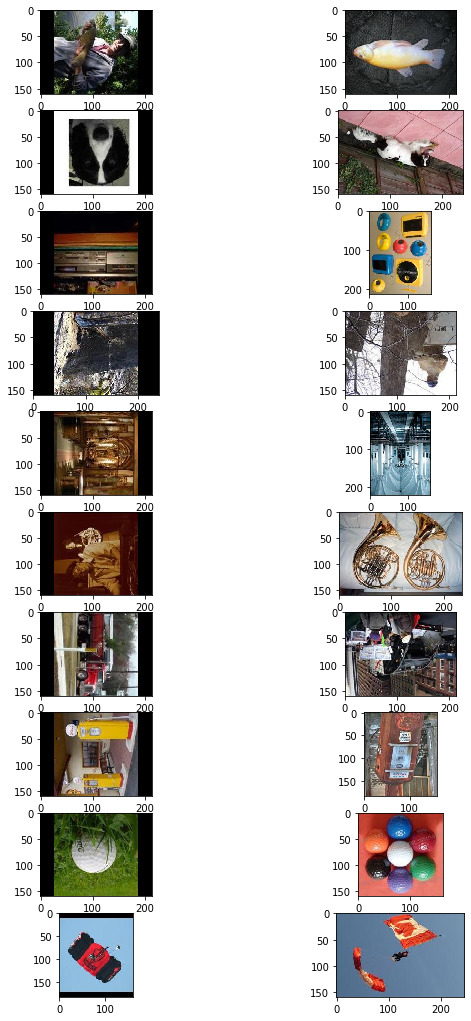

In [3]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

images = []

dir1 = os.listdir('datasets/train')

for i in dir1:
    count=0
    for img_path in glob.glob('datasets/train/{}/*.JPEG'.format(i)):
        
        images.append(mpimg.imread(img_path))
        count = count+1
        if count ==2 :
            break
            
#Plot at least two samples from each class of the dataset
            
plt.figure(figsize=(10,20))
columns = 2
count=0
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image)
        

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib.pyplot import imread, imshow, subplots, show,title

def plot(data_generator):
    """
    Plots 4 images generated by an object of the ImageDataGenerator class.
    """
    data_generator.fit(images)
    image_iterator = data_generator.flow(images)
    
    # Plot the images given by the iterator
    fig, rows = subplots(nrows=1, ncols=3, figsize=(18,18))
    for row in rows:
        row.imshow(image_iterator.next()[0].astype('int'))
        row.axis('off')
    show()

In [ ]:
#Data Visualization and augmentation

####################HORIZONTAL FLIP#####################


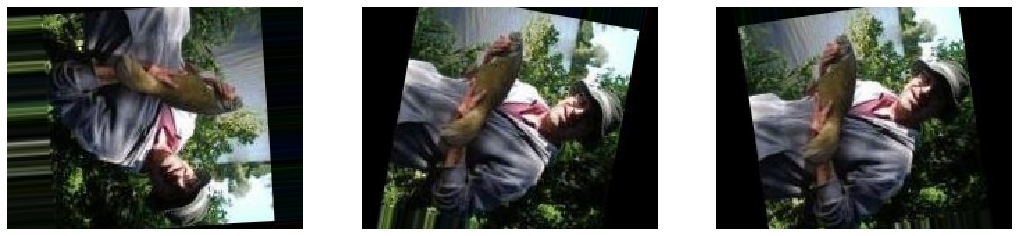

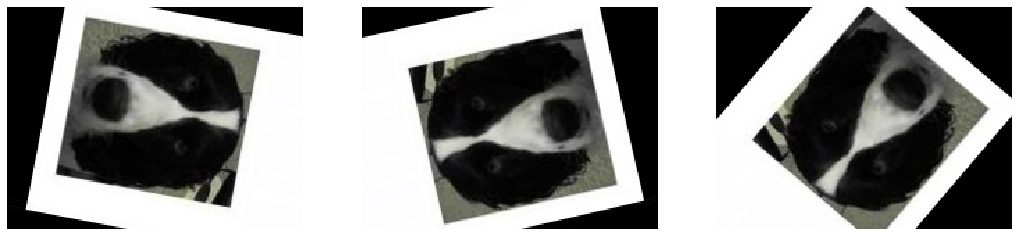

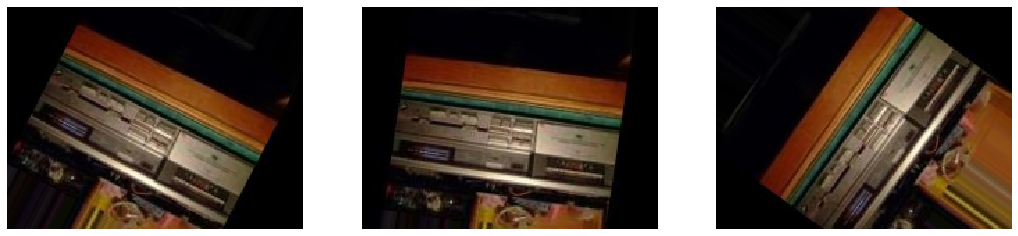

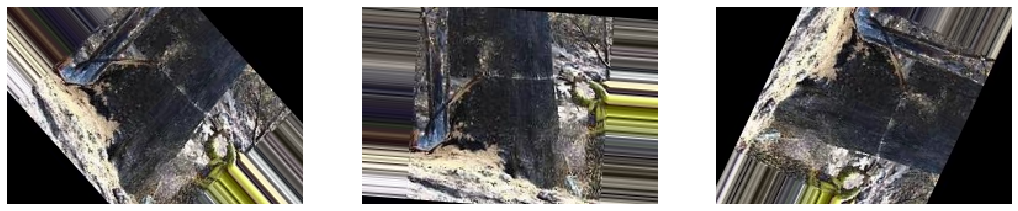

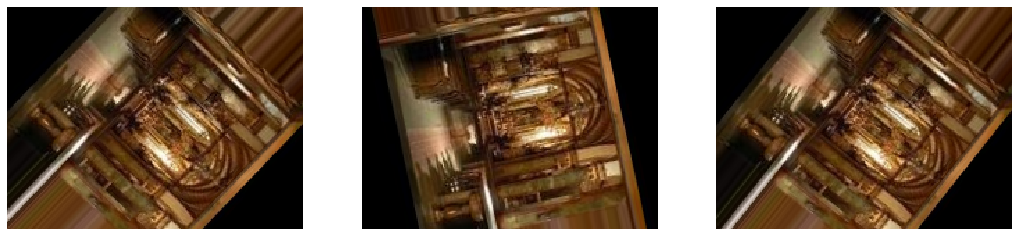

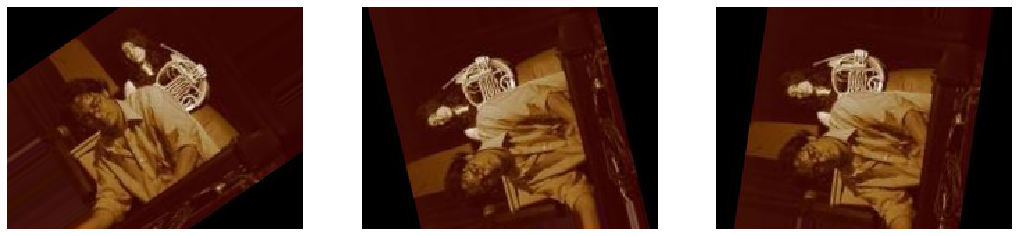

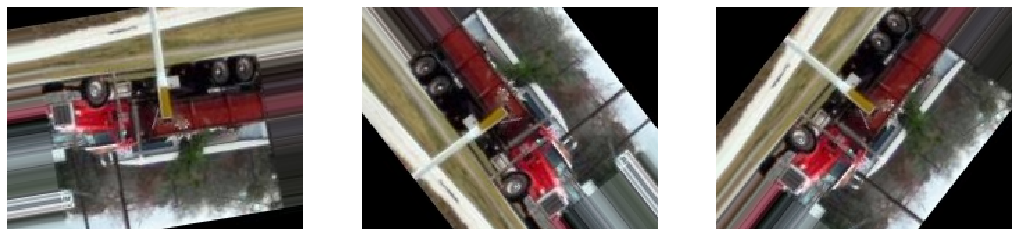

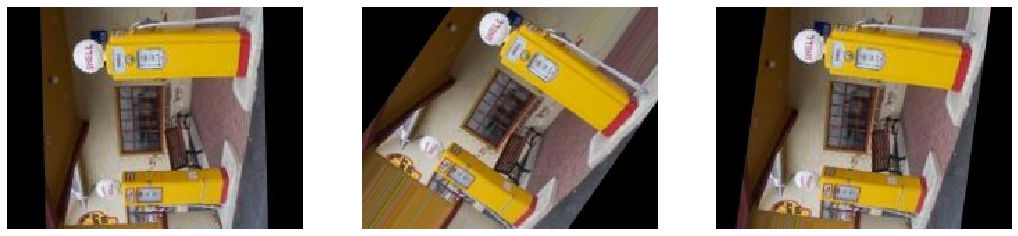

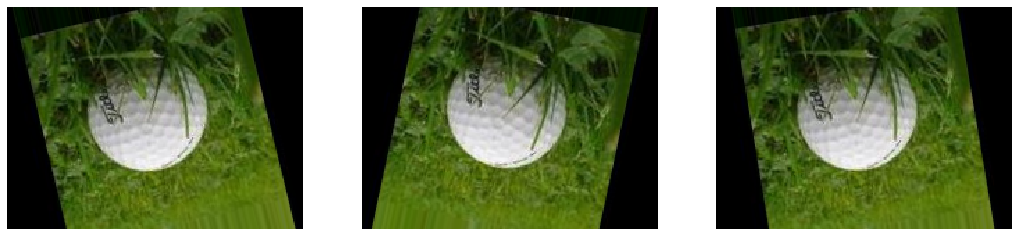

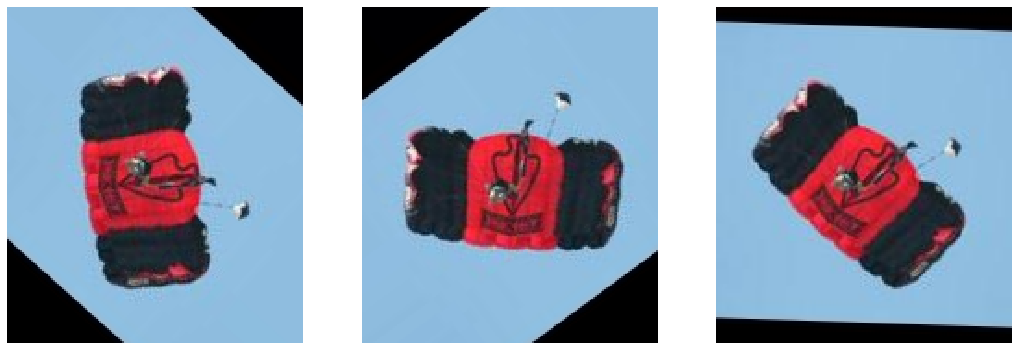

In [4]:
#Horizontal flip

images = []

dir1 = os.listdir('datasets/train')

print('####################HORIZONTAL FLIP#####################')
for i in dir1:
    count=0
    
    for img_path in glob.glob('datasets/train/{}/*.JPEG'.format(i)):
        
        image = imread(img_path)
        

# Creating a dataset which contains just one image.
        images = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
        data_generator = ImageDataGenerator(rotation_range=90)
        plot(data_generator)
        
        count = count+1
        if count ==1 :
            break
        

####################WIDTH SHIFT RANGE#####################


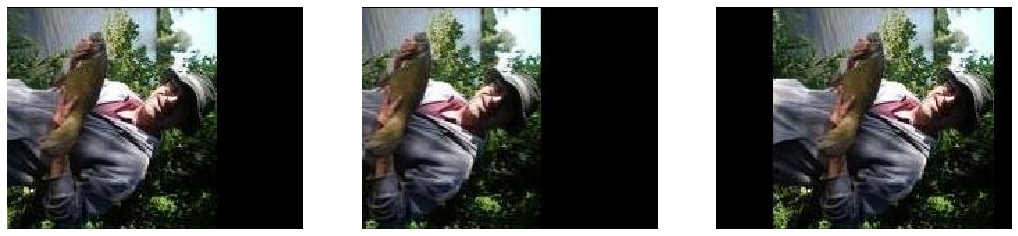

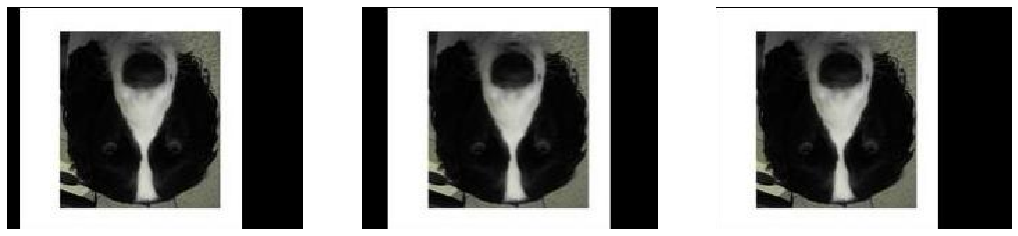

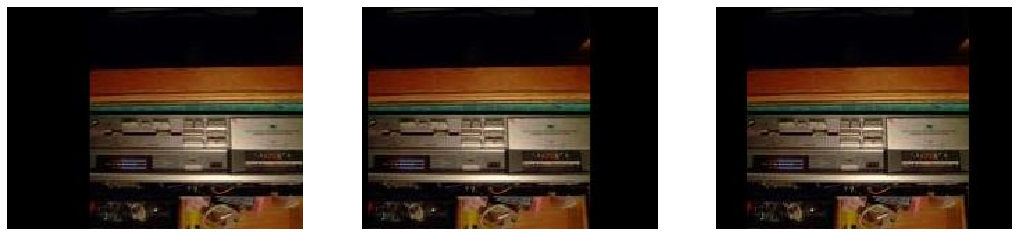

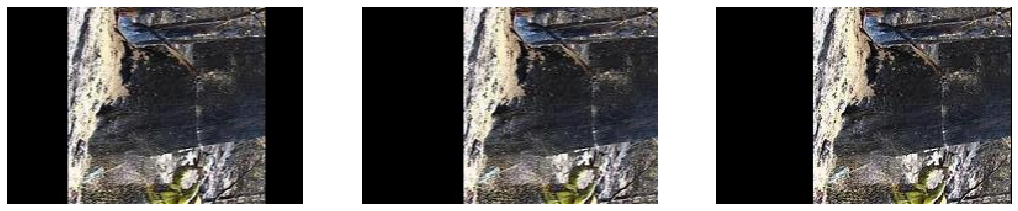

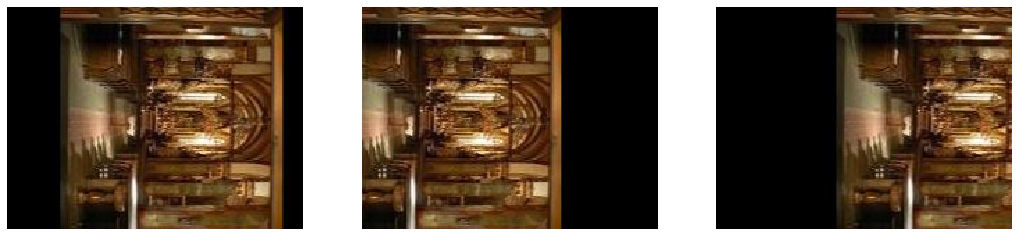

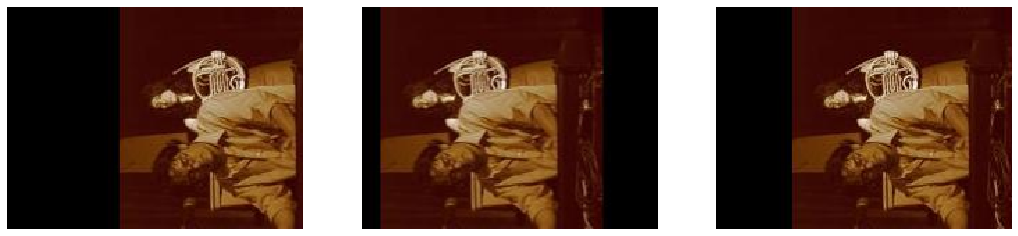

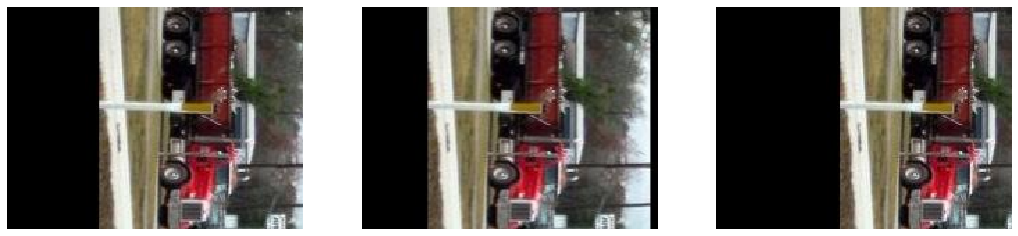

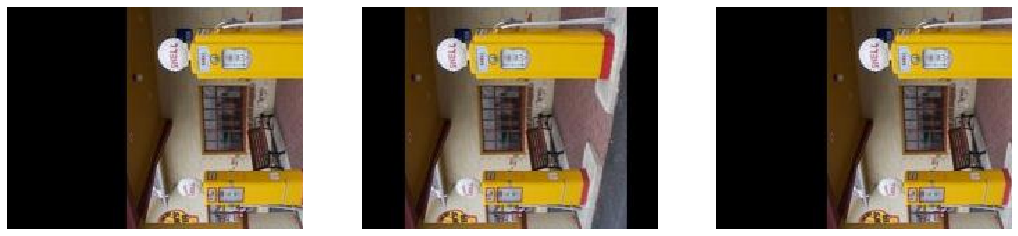

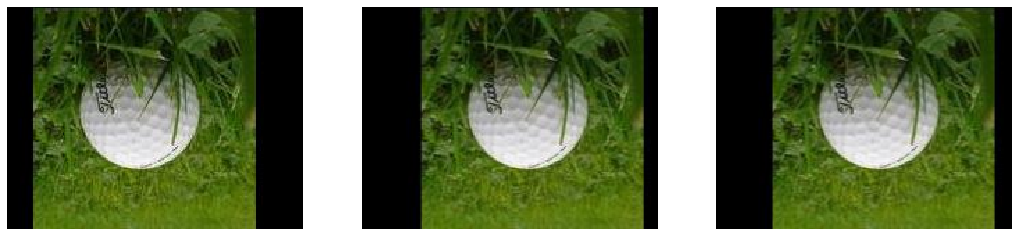

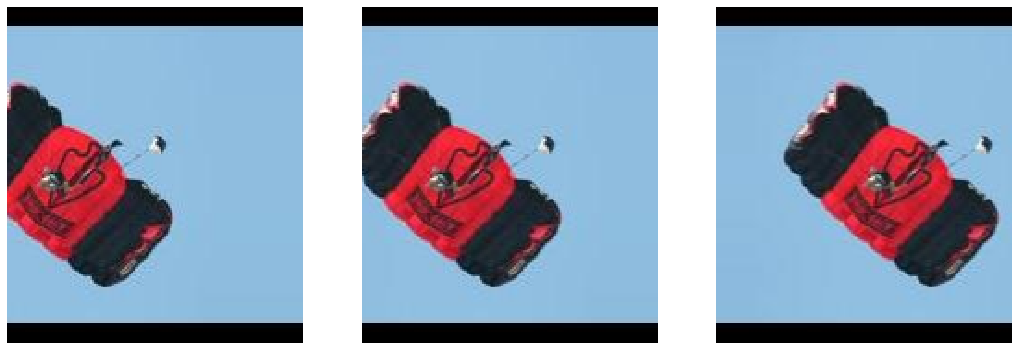

In [5]:
#width Shift range

images = []

dir1 = os.listdir('datasets/train')

print('####################WIDTH SHIFT RANGE#####################')
for i in dir1:
    count=0
    for img_path in glob.glob('datasets/train/{}/*.JPEG'.format(i)):
        
        image = imread(img_path)

# Creating a dataset which contains just one image.
        images = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
        data_generator = ImageDataGenerator(width_shift_range=0.3)
        plot(data_generator)
        
        count = count+1
        if count ==1 :
            break
        

In [5]:

train_data_dir='datasets/train/'
val_dir = 'datasets/val/'
img_height = 128
img_width=128
batch_size=71000
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    ) # set validation split

val_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    color_mode = 'grayscale',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training') # set as training data

validation_generator = val_datagen.flow_from_directory(
    val_dir, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size,
    color_mode = 'grayscale',
    class_mode='categorical',
    subset='validation')

Found 71524 images belonging to 10 classes.
Found 780 images belonging to 10 classes.


In [6]:
X_train, y_train = next(train_generator)
X_test, y_test = next(validation_generator)

In [11]:
#Print the shapes of train and test data.
print(X_train.shape)
print(y_train.shape)

(71000, 128, 128, 1)


(71000, 10)

In [20]:
num_pixels = X_train.shape[1] * X_train.shape[2]


In [ ]:
#Model Building

In [14]:
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout
from tensorflow.keras import regularizers
from keras.optimizers import SGD
from keras.regularizers import l2
#create model
model = Sequential()

#get number of columns in training data
n_cols = X_train.shape[1]
sgd = SGD(lr=0.001, momentum=0.8,nesterov=False)
#add model layers
model.add(Dense(512, activation='relu', input_shape=(num_pixels,)))
#add dropout between two dense fully connected layers.
model.add(Dropout(.2))
model.add(Dense(256, activation='relu',kernel_regularizer=regularizers.l2(1e-2)))
model.add(Dense(128, activation='relu',kernel_regularizer=regularizers.l2(1e-2)))
model.add(Dense(64, activation='relu',kernel_regularizer=regularizers.l2(1e-2)))

model.add(Dense(10,activation='softmax'))

In [15]:
#Compile the model with the appropriate loss function
model.compile(optimizer=sgd, loss='categorical_crossentropy',metrics=['accuracy'])
#Print the model summary
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               8389120   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total params: 8,562,250
Trainable params: 8,562,250
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Train the model for an appropriate number of epochs. Print the train and validation accuracy and loss for each epoch. Use the appropriate batch size

In [19]:
from keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
from keras import callbacks
from time import time
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)
#callbacks =[earlystopping]
#set early stopping monitor so the model stops training when it won't improve anymore
#early_stopping_monitor = EarlyStopping(patience=3)
#train moprint(del
print(model.summary())
start = time()
history = model.fit(X_train.reshape((-1,128*128)), y_train,batch_size=32, validation_split=0.1, epochs=300)

#Print the total time taken for training
print(time()-start)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               8389120   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total params: 8,562,250
Trainable params: 8,562,250
Non-trainable params: 0
_________________________________________________________________


63900/63900 [==============================] - 28s 441us/step - loss: 1.7216 - acc: 0.4456 - val_loss: 2.2646 - val_acc: 0.2856
Epoch 109/300
63900/63900 [==============================] - 29s 453us/step - loss: 1.7177 - acc: 0.4462 - val_loss: 2.1874 - val_acc: 0.2961
Epoch 110/300
63900/63900 [==============================] - 29s 455us/step - loss: 1.7134 - acc: 0.4497 - val_loss: 2.1709 - val_acc: 0.3015
Epoch 111/300
63900/63900 [==============================] - 29s 454us/step - loss: 1.7055 - acc: 0.4538 - val_loss: 2.1859 - val_acc: 0.2945
Epoch 112/300
63900/63900 [==============================] - 29s 460us/step - loss: 1.6974 - acc: 0.4558 - val_loss: 2.1617 - val_acc: 0.3055
Epoch 113/300
63900/63900 [==============================] - 31s 488us/step - loss: 1.6928 - acc: 0.4565 - val_loss: 2.1721 - val_acc: 0.3049
Epoch 114/300
63900/63900 [==============================] - 35s 547us/step - loss: 1.6837 - acc: 0.4620 - val_loss: 2.1998 - val_acc: 0.3015
Epoch 115/300
63900/

63900/63900 [==============================] - 31s 483us/step - loss: 1.0250 - acc: 0.7128 - val_loss: 3.0023 - val_acc: 0.2911
Epoch 223/300
63900/63900 [==============================] - 31s 487us/step - loss: 1.0184 - acc: 0.7145 - val_loss: 2.9894 - val_acc: 0.2865
Epoch 224/300
63900/63900 [==============================] - 32s 498us/step - loss: 1.0152 - acc: 0.7182 - val_loss: 3.0661 - val_acc: 0.2925
Epoch 225/300
63900/63900 [==============================] - 30s 473us/step - loss: 1.0052 - acc: 0.7187 - val_loss: 3.0954 - val_acc: 0.2724
Epoch 226/300
63900/63900 [==============================] - 31s 482us/step - loss: 1.0094 - acc: 0.7162 - val_loss: 2.9952 - val_acc: 0.2935
Epoch 227/300
63900/63900 [==============================] - 33s 511us/step - loss: 0.9972 - acc: 0.7238 - val_loss: 3.1183 - val_acc: 0.2859
Epoch 228/300
63900/63900 [==============================] - 32s 508us/step - loss: 0.9963 - acc: 0.7237 - val_loss: 3.0944 - val_acc: 0.2849
Epoch 229/300
63900/

In [ ]:
#Accuracy - 81.89%
#Val Avvuracy - 26.90%
#train time = 9799.09 seconds

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


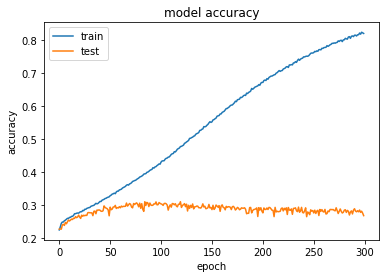

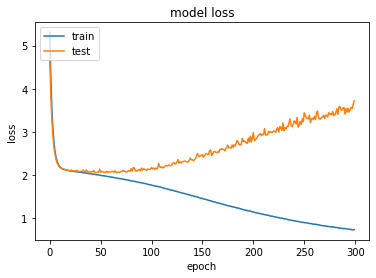

In [22]:
#Print the final train and validation loss and accuracy

import matplotlib.pyplot as plt
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [33]:
#Print confusion matrix and classification report for the validation dataset
from sklearn.metrics import confusion_matrix,classification_report

Y_pred = model.predict(X_test.reshape((-1,128*128)))
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(validation_generator.classes, y_pred)
print(cm)
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred))

Confusion Matrix
[[ 6  2 18  1 11  1 15  4  8 11]
 [10  5 18  3  5  1  9  6 10 12]
 [12  4  9  5 13  1  8  4 10  5]
 [ 5  5 14  3  6  4 12  7 12  9]
 [ 9  2 11  4 13  1 14  6  5 16]
 [12  3 18  2  4  4  6  5  9 15]
 [ 8  7 13  5  8  3  9  6 10  8]
 [11  2 18  3 12  0 17  1  9 10]
 [ 5  6 14  4 12  2 13  3 10 10]
 [ 8  4 12  1  7  1 11  8 11 15]]
Classification Report
              precision    recall  f1-score   support

           0       0.07      0.08      0.07        77
           1       0.12      0.06      0.08        79
           2       0.06      0.13      0.08        71
           3       0.10      0.04      0.06        77
           4       0.14      0.16      0.15        81
           5       0.22      0.05      0.08        78
           6       0.08      0.12      0.09        77
           7       0.02      0.01      0.02        83
           8       0.11      0.13      0.12        79
           9       0.14      0.19      0.16        78

    accuracy                      

In [ ]:
#best performing class - 9
#worst performing class - 1

In [ ]:
#hyperparameter tunning
#Network Depth: Change the number of hidden layers and hidden units for each layer

In [ ]:
#Model Building 

In [41]:
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout
from tensorflow.keras import regularizers
from keras.optimizers import SGD
from keras.regularizers import l2
#create model
model = Sequential()

#get number of columns in training data
n_cols = X_train.shape[1]
sgd = SGD(lr=0.001, momentum=0.8,nesterov=False)
#add model layers
model.add(Dense(256, activation='relu', input_shape=(num_pixels,)))
model.add(Dropout(.2))
model.add(Dense(128, activation='relu',kernel_regularizer=regularizers.l2(1e-2)))
model.add(Dense(128, activation='relu',kernel_regularizer=regularizers.l2(1e-2)))
model.add(Dense(128, activation='relu',kernel_regularizer=regularizers.l2(1e-2)))
model.add(Dense(64, activation='relu',kernel_regularizer=regularizers.l2(1e-2)))

model.add(Dense(10,activation='softmax'))

In [42]:
#Compile the model with the appropriate loss function
model.compile(optimizer=sgd, loss='categorical_crossentropy',metrics=['accuracy'])
#Print the model summary
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 256)               4194560   
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_19 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_20 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_21 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_22 (Dense)             (None, 10)                650       
Total para

In [44]:
from keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
from keras import callbacks
from time import time
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)
#callbacks =[earlystopping]
#set early stopping monitor so the model stops training when it won't improve anymore
#early_stopping_monitor = EarlyStopping(patience=3)
#train moprint(del
print(model.summary())
start = time()
history = model.fit(X_train.reshape((-1,128*128)), y_train,batch_size=128, validation_split=0.1, epochs=300)

#Print the total time taken for training
print(time()-start)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 256)               4194560   
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_19 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_20 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_21 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_22 (Dense)             (None, 10)                650       
Total para

63900/63900 [==============================] - 16s 243us/step - loss: 2.0684 - acc: 0.2972 - val_loss: 2.1300 - val_acc: 0.2739 2. -
Epoch 108/300
63900/63900 [==============================] - 16s 247us/step - loss: 2.0678 - acc: 0.2974 - val_loss: 2.1248 - val_acc: 0.2727
Epoch 109/300
63900/63900 [==============================] - 16s 244us/step - loss: 2.0662 - acc: 0.2963 - val_loss: 2.1489 - val_acc: 0.26080667 
Epoch 110/300
63900/63900 [==============================] - 16s 251us/step - loss: 2.0637 - acc: 0.2993 - val_loss: 2.1367 - val_acc: 0.2728
Epoch 111/300
63900/63900 [==============================] - 16s 255us/step - loss: 2.0623 - acc: 0.2999 - val_loss: 2.1233 - val_acc: 0.2752
Epoch 112/300
63900/63900 [==============================] - 12s 191us/step - loss: 2.0598 - acc: 0.2995 - val_loss: 2.1487 - val_acc: 0.2638
Epoch 113/300
63900/63900 [==============================] - 15s 237us/step - loss: 2.0580 - acc: 0.3017 - val_loss: 2.1394 - val_acc: 0.2652
Epoch 114/

Epoch 165/300
63900/63900 [==============================] - 14s 226us/step - loss: 1.9728 - acc: 0.3314 - val_loss: 2.1614 - val_acc: 0.2725
Epoch 166/300
63900/63900 [==============================] - 16s 245us/step - loss: 1.9740 - acc: 0.3301 - val_loss: 2.1396 - val_acc: 0.2725
Epoch 167/300
63900/63900 [==============================] - 16s 244us/step - loss: 1.9714 - acc: 0.3297 - val_loss: 2.1373 - val_acc: 0.2739
Epoch 168/300
63900/63900 [==============================] - 16s 250us/step - loss: 1.9664 - acc: 0.3347 - val_loss: 2.1413 - val_acc: 0.2815
Epoch 169/300
63900/63900 [==============================] - 16s 247us/step - loss: 1.9674 - acc: 0.3327 - val_loss: 2.1427 - val_acc: 0.2851
Epoch 170/300
63900/63900 [==============================] - 16s 250us/step - loss: 1.9638 - acc: 0.3332 - val_loss: 2.1617 - val_acc: 0.2811
Epoch 171/300
63900/63900 [==============================] - 16s 252us/step - loss: 1.9617 - acc: 0.3356 - val_loss: 2.1436 - val_acc: 0.2773
Epoch 

Epoch 223/300
63900/63900 [==============================] - 7s 116us/step - loss: 1.8665 - acc: 0.3661 - val_loss: 2.1968 - val_acc: 0.2823
Epoch 224/300
63900/63900 [==============================] - 7s 115us/step - loss: 1.8675 - acc: 0.3686 - val_loss: 2.2177 - val_acc: 0.2868
Epoch 225/300
63900/63900 [==============================] - 7s 115us/step - loss: 1.8632 - acc: 0.3680 - val_loss: 2.2193 - val_acc: 0.2761
Epoch 226/300
63900/63900 [==============================] - 7s 116us/step - loss: 1.8573 - acc: 0.3701 - val_loss: 2.2508 - val_acc: 0.2820
Epoch 227/300
63900/63900 [==============================] - 7s 115us/step - loss: 1.8599 - acc: 0.3702 - val_loss: 2.2096 - val_acc: 0.2846
Epoch 228/300
63900/63900 [==============================] - 7s 117us/step - loss: 1.8586 - acc: 0.3691 - val_loss: 2.2547 - val_acc: 0.2735
Epoch 229/300
63900/63900 [==============================] - 8s 119us/step - loss: 1.8603 - acc: 0.3700 - val_loss: 2.2213 - val_acc: 0.2820
Epoch 230/300

In [ ]:
#Accuracy - 41.41%
#Val Avvuracy - 28.51%
#train time = 3900.76 seconds

In [ ]:
#reduction in accuracy is explainable through the decrease in number on nodes in a layer, 
#though we have added one more dense layer we see that accuracy is dropped based on the number of nodes

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


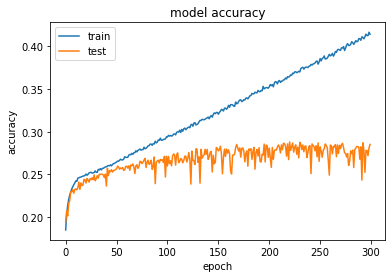

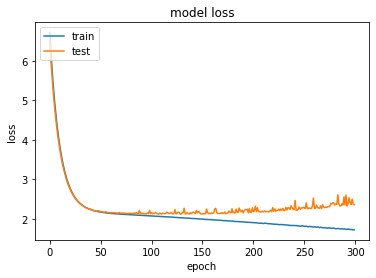

In [45]:
#Print the final train and validation loss and accuracy
import matplotlib.pyplot as plt
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [46]:
#Print confusion matrix and classification report for the validation dataset
from sklearn.metrics import confusion_matrix,classification_report

Y_pred = model.predict(X_test.reshape((-1,128*128)))
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(validation_generator.classes, y_pred)
print(cm)
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred))

Confusion Matrix
[[20  5  8  3  8  5 11  7  1  9]
 [18  2 13  3  6  7 14  3  3 10]
 [15 10  6  1 10  6 12  3  5  3]
 [18  9 10  2  4  6 13  5  3  7]
 [23  5  8  1  9  7  5  9  2 12]
 [14  8 11  5  5 11  8  3  6  7]
 [18 13  4  6  8  5  9  6  2  6]
 [18  6 12  3  7  6  9  6  5 11]
 [16 13  9  3  7  8  7  5  2  9]
 [19  9  7  3  3  5 10  6  4 12]]
Classification Report
              precision    recall  f1-score   support

           0       0.11      0.26      0.16        77
           1       0.03      0.03      0.03        79
           2       0.07      0.08      0.08        71
           3       0.07      0.03      0.04        77
           4       0.13      0.11      0.12        81
           5       0.17      0.14      0.15        78
           6       0.09      0.12      0.10        77
           7       0.11      0.07      0.09        83
           8       0.06      0.03      0.04        79
           9       0.14      0.15      0.15        78

    accuracy                      

In [ ]:
#best performing class - 0
#worst performing class - 1

In [ ]:
#Optimizer: Use a different optimizer with the appropriate LR value

In [ ]:
#Model Building - with ADAM optimizer

In [47]:
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout
from tensorflow.keras import regularizers
from keras.optimizers import SGD
from keras.regularizers import l2
#create model
model = Sequential()

#get number of columns in training data
n_cols = X_train.shape[1]
sgd = SGD(lr=0.001, momentum=0.8,nesterov=False)
#add model layers
model.add(Dense(512, activation='relu', input_shape=(num_pixels,)))
model.add(Dropout(.2))
model.add(Dense(256, activation='relu',kernel_regularizer=regularizers.l2(1e-2)))
model.add(Dense(128, activation='relu',kernel_regularizer=regularizers.l2(1e-2)))
model.add(Dense(64, activation='relu',kernel_regularizer=regularizers.l2(1e-2)))

model.add(Dense(10,activation='softmax'))

In [48]:
#Compile the model with the appropriate loss function
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
#Print the model summary
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 512)               8389120   
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_25 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_26 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_27 (Dense)             (None, 10)                650       
Total params: 8,562,250
Trainable params: 8,562,250
Non-trainable params: 0
_________________________________________________________________


In [49]:
from keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
from keras import callbacks
from time import time
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)
#callbacks =[earlystopping]
#set early stopping monitor so the model stops training when it won't improve anymore
#early_stopping_monitor = EarlyStopping(patience=3)
#train moprint(del
print(model.summary())
start = time()
history = model.fit(X_train.reshape((-1,128*128)), y_train,batch_size=128, validation_split=0.1, epochs=300)

#Print the total time taken for training
print(time()-start)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 512)               8389120   
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_25 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_26 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_27 (Dense)             (None, 10)                650       
Total params: 8,562,250
Trainable params: 8,562,250
Non-trainable params: 0
_________________________________________________________________


63900/63900 [==============================] - 16s 254us/step - loss: 1.8645 - acc: 0.3646 - val_loss: 2.1090 - val_acc: 0.2715
Epoch 109/300
63900/63900 [==============================] - 16s 255us/step - loss: 1.8662 - acc: 0.3642 - val_loss: 2.1023 - val_acc: 0.2690
Epoch 110/300
63900/63900 [==============================] - 16s 255us/step - loss: 1.8652 - acc: 0.3647 - val_loss: 2.1082 - val_acc: 0.2742
Epoch 111/300
63900/63900 [==============================] - 16s 255us/step - loss: 1.8625 - acc: 0.3650 - val_loss: 2.0994 - val_acc: 0.2746
Epoch 112/300
63900/63900 [==============================] - 16s 256us/step - loss: 1.8552 - acc: 0.3673 - val_loss: 2.1259 - val_acc: 0.2713
Epoch 113/300
63900/63900 [==============================] - 16s 256us/step - loss: 1.8529 - acc: 0.3699 - val_loss: 2.0942 - val_acc: 0.2724
Epoch 114/300
63900/63900 [==============================] - 16s 255us/step - loss: 1.8545 - acc: 0.3687 - val_loss: 2.0896 - val_acc: 0.2761
Epoch 115/300
63900/

Epoch 223/300
63900/63900 [==============================] - 16s 256us/step - loss: 1.6333 - acc: 0.4569 - val_loss: 2.3616 - val_acc: 0.2534
Epoch 224/300
63900/63900 [==============================] - 16s 251us/step - loss: 1.6319 - acc: 0.4575 - val_loss: 2.3298 - val_acc: 0.2511
Epoch 225/300
63900/63900 [==============================] - 16s 253us/step - loss: 1.6304 - acc: 0.4570 - val_loss: 2.3183 - val_acc: 0.2549
Epoch 226/300
63900/63900 [==============================] - 16s 251us/step - loss: 1.6299 - acc: 0.4580 - val_loss: 2.3116 - val_acc: 0.2611
Epoch 227/300
63900/63900 [==============================] - 29s 451us/step - loss: 1.6340 - acc: 0.4557 - val_loss: 2.3861 - val_acc: 0.2379
Epoch 228/300
63900/63900 [==============================] - 17s 261us/step - loss: 1.6249 - acc: 0.4580 - val_loss: 2.2824 - val_acc: 0.2545
Epoch 229/300
63900/63900 [==============================] - 16s 254us/step - loss: 1.6256 - acc: 0.4577 - val_loss: 2.3688 - val_acc: 0.2513
Epoch 

Epoch 281/300
63900/63900 [==============================] - 16s 258us/step - loss: 1.5305 - acc: 0.4928 - val_loss: 2.4223 - val_acc: 0.2485
Epoch 282/300
63900/63900 [==============================] - 17s 266us/step - loss: 1.5466 - acc: 0.4882 - val_loss: 2.4307 - val_acc: 0.2524
Epoch 283/300
63900/63900 [==============================] - 17s 272us/step - loss: 1.5363 - acc: 0.4917 - val_loss: 2.4650 - val_acc: 0.2482
Epoch 284/300
63900/63900 [==============================] - 17s 260us/step - loss: 1.5425 - acc: 0.4904 - val_loss: 2.4072 - val_acc: 0.2545
Epoch 285/300
63900/63900 [==============================] - 17s 260us/step - loss: 1.5246 - acc: 0.4960 - val_loss: 2.4182 - val_acc: 0.2530
Epoch 286/300
63900/63900 [==============================] - 16s 256us/step - loss: 1.5480 - acc: 0.4871 - val_loss: 2.4420 - val_acc: 0.2423
Epoch 287/300
63900/63900 [==============================] - 17s 264us/step - loss: 1.5311 - acc: 0.4957 - val_loss: 2.4406 - val_acc: 0.2546
Epoch 

In [ ]:
#Accuracy - 49.73%
#Val Avvuracy - 24.42%
#train time = 5065.68 seconds

In [ ]:
#ADAM optimiser is giving poor results when compared with stochastic gradient descent optimiser

In [50]:
model.save('final3.h5')

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


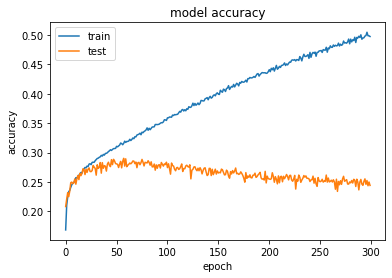

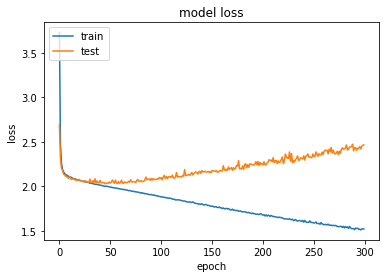

In [51]:
#Print the final train and validation loss and accuracy
import matplotlib.pyplot as plt
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [52]:
#Print confusion matrix and classification report for the validation dataset
from sklearn.metrics import confusion_matrix,classification_report

Y_pred = model.predict(X_test.reshape((-1,128*128)))
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(validation_generator.classes, y_pred)
print(cm)
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred))

Confusion Matrix
[[10  3 15  8  5  9 10  6  6  5]
 [11 15 13  7  2  6  7  7  4  7]
 [10  4 10  6  5  3  9 14  5  5]
 [ 9  6 10  4  5  8 12 12  3  8]
 [14  7  7  8 12  2  9 13  2  7]
 [11  6 13 12  3  7  6 14  1  5]
 [14  7  7  9 10  3 11 14  2  0]
 [14  4 14 10  5  5  6 12  7  6]
 [ 6  4  8 11  4  9 11 16  6  4]
 [16  7 12  7  4  4  8  6  5  9]]
Classification Report
              precision    recall  f1-score   support

           0       0.09      0.13      0.10        77
           1       0.24      0.19      0.21        79
           2       0.09      0.14      0.11        71
           3       0.05      0.05      0.05        77
           4       0.22      0.15      0.18        81
           5       0.12      0.09      0.10        78
           6       0.12      0.14      0.13        77
           7       0.11      0.14      0.12        83
           8       0.15      0.08      0.10        79
           9       0.16      0.12      0.13        78

    accuracy                      

In [ ]:
#best performing class - 1
#worst performing class - 3